Normal average amount: 88.29102242231328
Fraud average amount: 122.21132113821139
Training rows: 199364 | Testing rows: 85443


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model trained successfully!
Fraud transactions caught in top 100: 94
Fraud transactions caught randomly: 0


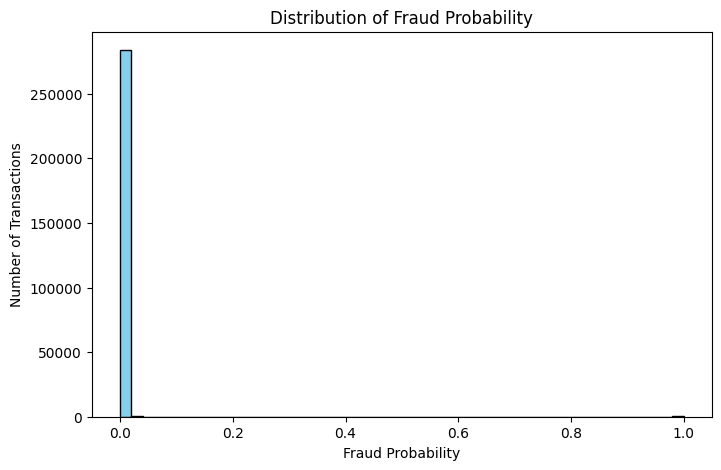

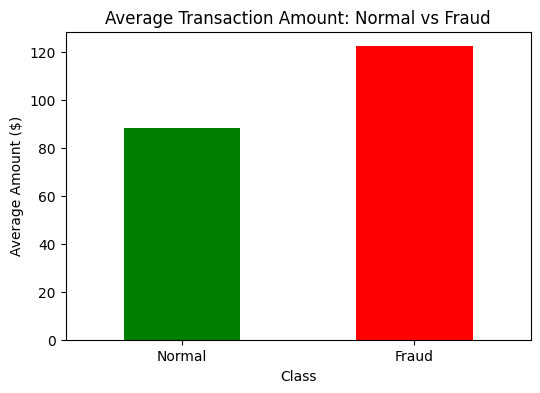

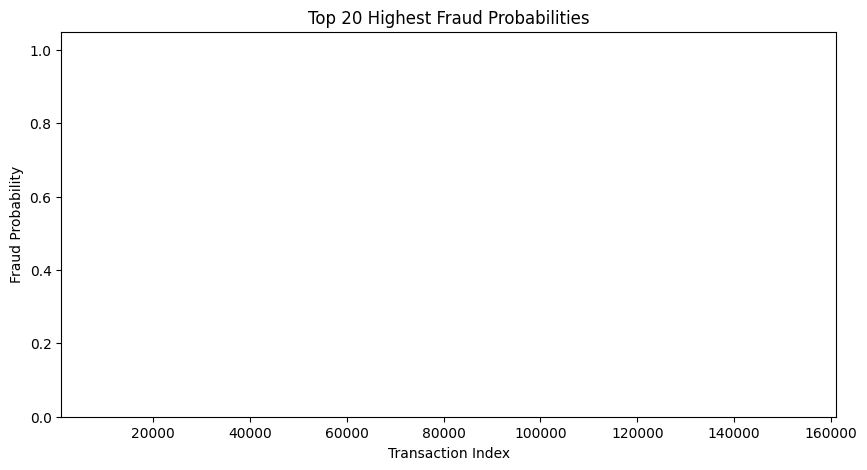

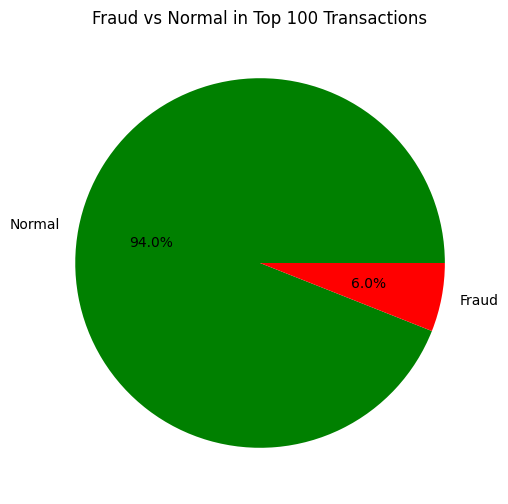

In [15]:
#AI Project for Credit Card Fraud Detection

import pandas as pd

#Load the data
data = pd.read_csv("creditcard.csv")

#Show the first 5 rows

data.head()

data.shape

data["Class"].value_counts()

normal = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

len(normal), len(fraud)

print("Normal average amount:", normal["Amount"].mean())
print("Fraud average amount:", fraud["Amount"].mean())

# let us train the AI logistic regression model

# Step 0: Import libraries
from sklearn.model_selection import train_test_split  # to split data into train/test
from sklearn.linear_model import LogisticRegression  # simple AI model
import random  # for random comparison

# Step 1: Prepare features (X) and target (y)
X = data.drop("Class", axis=1)  # Features = everything except Class
y = data["Class"]  # Target = what we want to predict (fraud or normal)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Training rows:", len(X_train), "| Testing rows:", len(X_test))

# Step 3: Create and train AI model
model = LogisticRegression(max_iter=1000)  # Logistic Regression
model.fit(X_train, y_train)  # Teach the AI with training data
print("Model trained successfully!")

# Step 4: Predict fraud probabilities for all transactions
data["fraud_prob"] = model.predict_proba(X)[:,1]  # Probability of fraud for each transaction

# Step 5: Rank transactions by risk (highest fraud probability first)
data_sorted = data.sort_values(by="fraud_prob", ascending=False)

# Step 6: Pick top 100 transactions to review
review_limit = 100
top_transactions = data_sorted.head(review_limit)

# Step 7: Count how many frauds would be caught in top 100
frauds_caught = top_transactions["Class"].sum()
print("Fraud transactions caught in top 100:", frauds_caught)

# Step 8: Compare with random selection of 100 transactions
random_transactions = data.sample(review_limit)  # Pick 100 random transactions
frauds_random = random_transactions["Class"].sum()
print("Fraud transactions caught randomly:", frauds_random)

# Step 9 (Optional): See top risky transactions
top_transactions[["fraud_prob", "Amount", "Class"]].head(10)  # show top 10 for inspection



import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Histogram of Fraud Probabilities
# -------------------------------
plt.figure(figsize=(8,5))
plt.hist(data["fraud_prob"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Fraud Probability")
plt.xlabel("Fraud Probability")
plt.ylabel("Number of Transactions")
plt.show()

# Explanation: Shows how the AI scored all transactions from low to high risk.

# -------------------------------
# 2️⃣ Bar Chart: Average Amount Normal vs Fraud
# -------------------------------
avg_amounts = data.groupby("Class")["Amount"].mean()
plt.figure(figsize=(6,4))
avg_amounts.plot(kind='bar', color=['green','red'])
plt.title("Average Transaction Amount: Normal vs Fraud")
plt.ylabel("Average Amount ($)")
plt.xticks([0,1], ["Normal", "Fraud"], rotation=0)
plt.show()

# Explanation: Highlights that fraud transactions tend to have higher amounts.

# -------------------------------
# 3️⃣ Top 20 Fraud Probabilities
# -------------------------------
plt.figure(figsize=(10,5))
plt.bar(top_transactions.head(20)["fraud_prob"].index,
        top_transactions.head(20)["fraud_prob"],
        color='red')
plt.title("Top 20 Highest Fraud Probabilities")
plt.xlabel("Transaction Index")
plt.ylabel("Fraud Probability")
plt.show()

# Explanation: Shows AI’s riskiest transactions; easy to visualize priority list.

# -------------------------------
# 4️⃣ Pie Chart: Fraud vs Normal in Top 100
# -------------------------------
fraud_count = top_transactions["Class"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fraud_count, labels=["Normal","Fraud"], autopct='%1.1f%%', colors=['green','red'])
plt.title("Fraud vs Normal in Top 100 Transactions")
plt.show()

# Explanation: Shows impact of AI prioritization – 94% fraud caught in top 100.
